In [86]:
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np


def rotation_matrix(rad):
    c,s = np.cos(rad), np.sin(rad)
    return np.array([[c,s], [-s, c]])

def drift_points(shape=(10,10), drift_angle = 0, drift_strength=1e-4):
    lenX, lenY = shape
    drift_vector = (rotation_matrix(drift_angle) @ [1,0]) * drift_strength
    arr = np.zeros((lenX, lenY, 2))
    drift = np.zeros(2)
    corners = []
    for yi in range(lenY):
        for xi in range(lenX):
            drift += drift_vector
            position = np.array((xi, yi))
            arr[xi, yi] = position + drift
            if (yi == 0 or yi == (lenY-1)) and (xi == 0 or xi == (lenX-1)):
                corner = np.array((xi, yi)) + drift
                corners.append(corner)
    return arr#, corners

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

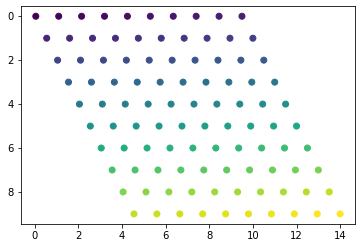

In [80]:
strength = 0.05
degree = 0
angle = np.deg2rad(degree)
x,y = drift_points(drift_strength=strength, drift_angle=angle).T
plt.figure()
plt.scatter(x,y,c=np.arange(np.prod(x.shape)))
plt.gca().invert_yaxis()
xlim = plt.xlim()
ylim = plt.ylim()

In [81]:
def plot(points, ax, lim=((),())):
    points = points.reshape((-1, 2), order='F')
    for i, xy in enumerate(points):
        rect = plt.Rectangle(xy-0.25, 0.5, 0.5, color=plt.cm.RdYlBu(i))
        ax.add_patch(rect)
    xmin, ymin = points.min(0) - 2
    xmax, ymax = points.max(0) + 3
    if lim == ((),()):
        ax.set_xlim(xmin, xmax)
        ax.set_ylim(ymax, ymin)
    else:
        ax.set_xlim(lim[0])
        ax.set_ylim(lim[1])  

In [82]:
from matplotlib.transforms import Affine2D

<Figure size 432x288 with 0 Axes>

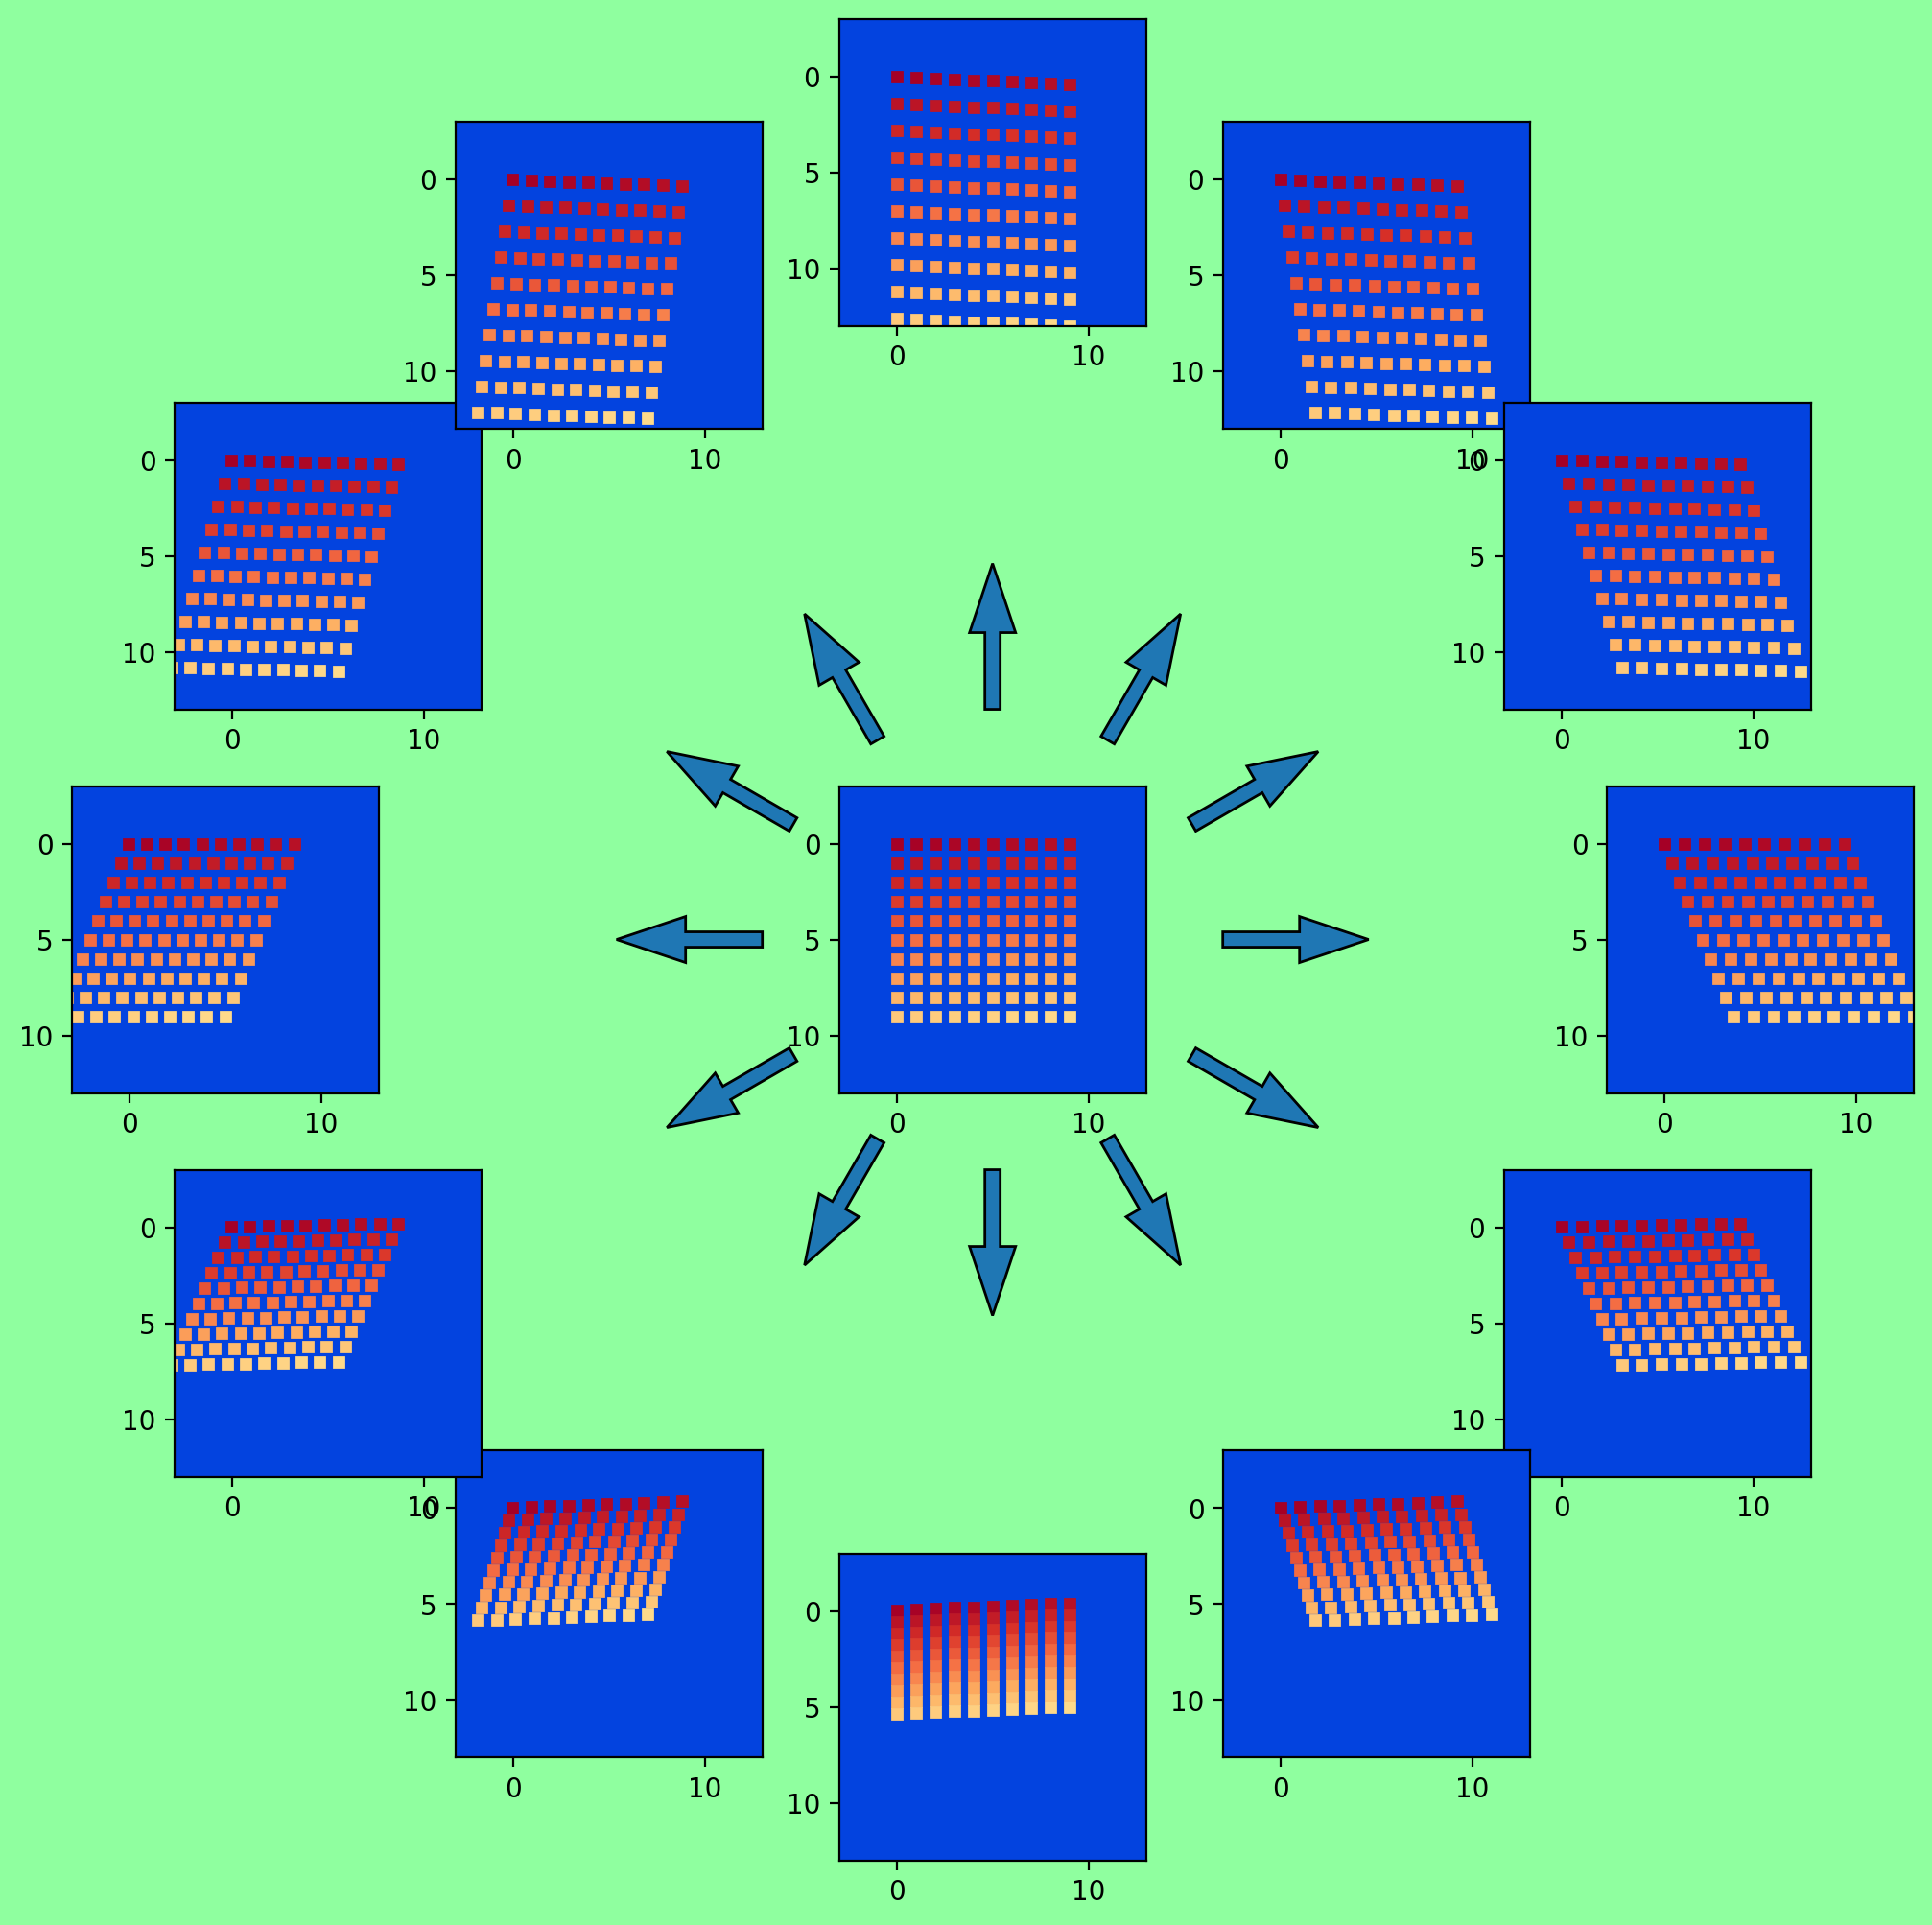

In [90]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.close('all')
fig = plt.figure()


fig = plt.figure(figsize=(8, 8), dpi=200)
fig.patch.set_facecolor('xkcd:mint green')

#fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

r = 1
strength = 0.04
shape = (10, 10)

height = 0.2
width = 0.2

ax = fig.add_axes((r/2 - width/2, r/2-height/2, width, height))
img0 = drift_points(shape = shape, drift_strength=0)
mn = img0.reshape((-1, 2)).min(0) - 3
mx = img0.reshape((-1, 2)).max(0) + 4
lim = ((mn[0], mx[0]), (mx[1], mn[1]))
plot(img0, ax, lim = lim)
#ax.axis('off')
ax.set_facecolor('xkcd:blue')

for i, angle in enumerate(np.linspace(0, 2*np.pi, 12, endpoint=False)):
    left =   r*np.cos(angle) / 2 + r/2
    bottom = r*np.sin(-angle) / 2 + r/2
    
    arrstartx = 0.3*np.cos(angle) / 2 + r/2
    arrstarty = 0.3*np.sin(-angle) / 2 + r/2
    
    arrendx = 0.4*np.cos(angle) / 2 + r/2
    arrendy = 0.4*np.sin(-angle) / 2 + r/2

    arrow = mpl.patches.FancyArrow(
        arrstartx, arrstarty, 
        arrendx - arrstartx, 
        arrendy - arrstarty, 
        transform=fig.transFigure, 
        figure=fig,
        width=0.01
    
    )

    fig.add_artist(arrow)
    
    ax = fig.add_axes((left-width/2, bottom-height/2, width, height))
    img = drift_points(shape=shape, drift_angle=angle, drift_strength=strength)
    plot(img, ax, lim=lim)#((-5, 20), (-5, 20)))
    #ax.axis('off')
    ax.set_facecolor('xkcd:blue')


In [129]:
shape = (128, 128)
strength = 0.004
angle = np.deg2rad(180)
img0 = drift_points(shape=shape, drift_angle=angle, drift_strength=0)
img1 = drift_points(shape=shape, drift_angle=angle, drift_strength=strength)

img0 = img0.reshape((-1, 2))
img1 = img1.reshape((-1, 2))

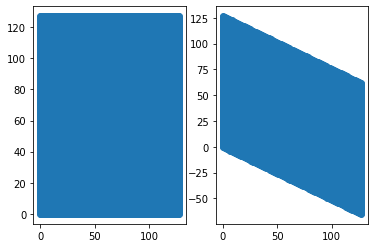

In [7]:
fig, (ax1, ax2) = plt.subplots(ncols=2)
ax1.scatter(*img0.T)
ax2.scatter(*img1.T)

In [8]:
A2 = np.ones((len(img0), 3))
A2[:,:2] = img0

B2 = np.ones((len(img1), 3))
B2[:, :2] = img1

T, *_ = np.linalg.lstsq(A2, B2, rcond=None)

(-200.0, 200.0)

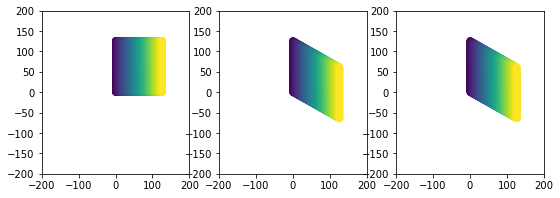

In [9]:
S = np.arange(1, len(A2)+1)

fig, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(9,3))
ax1.scatter(*A2.T[:2], c=S)
ax2.scatter(*(A2 @ T).T[:2], c=S)
ax3.scatter(*B2.T[:2], c=S)
#ax1.axis('equal')
#ax2.axis('equal')
#ax3.axis('equal')
ax1.set_xlim(-200, 200)
ax1.set_ylim(-200, 200)
ax2.set_xlim(-200, 200)
ax2.set_ylim(-200, 200)
ax3.set_xlim(-200, 200)
ax3.set_ylim(-200, 200)


In [10]:
from skimage.transform import warp
from scipy.misc import ascent
img = ascent()
img = img[::4, ::4]
img[:32] = 0
img[-32:] = 0
img[:,:32] = 0
img[:,-32:] = 0

img2 = warp(img, np.linalg.inv(T.T))

(-0.5, 127.5, -0.5, 127.5)

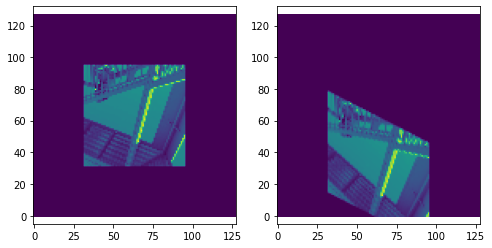

In [11]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,4))
ax1.imshow(img, origin='lower')
ax2.imshow(img2, origin='lower')
ax1.axis('equal')
ax2.axis('equal')


In [12]:
def rotation_matrix_3x3(rad):
    arr = np.eye(3)
    arr[:2, :2] = rotation_matrix(rad)
    return arr

In [30]:
from matplotlib.transforms import Affine2D

In [32]:
M = Affine2D().rotate(30)

In [33]:
M.get_matrix()

array([[ 0.15425145,  0.98803162,  0.        ],
       [-0.98803162,  0.15425145,  0.        ],
       [ 0.        ,  0.        ,  1.        ]])

In [78]:
def extend_3D_ones(arr_of_2d):
    return np.hstack([arr_of_2d, np.ones((len(arr_of_2d),1))])
    
def get_matrix(xy, xyprime):
    xy = extend_3D_ones(xy)
    xyprime = extend_3D_ones(xyprime)
    T, *_ = np.linalg.lstsq(xy, xyprime, rcond=None)
    return T.T

In [86]:
xy = img0.reshape((-1, 2))
xyprime = img1.reshape((-1, 2))
M = get_matrix(xy, xyprime)

x,y = xy.T
xp,yp = xyprime.T

In [91]:
def transform_points(points, transform):
    points = extend_3D_ones(points)
    points_prime = points @ transform.T
    return points_prime[:, :2]

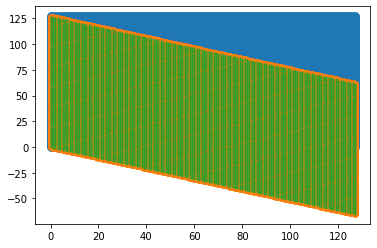

In [93]:
xp2, yp2 = transform_points(xy, M).T
plt.figure()
plt.scatter(x, y, s=60)
plt.scatter(xp, yp)
plt.scatter(xp2, yp2, s=1)

In [110]:
M = Affine2D().translate(-5, -5).translate(5,5)
M2 = Affine2D().translate(-5, -5).translate(5,5)

In [98]:
M.get_matrix()

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [99]:
from skimage.transform import AffineTransform

In [102]:
AffineTransform(rotation=np.pi/2)

<AffineTransform(matrix=
    [[ 6.123234e-17, -1.000000e+00,  0.000000e+00],
     [ 1.000000e+00,  6.123234e-17,  0.000000e+00],
     [ 0.000000e+00,  0.000000e+00,  1.000000e+00]]) at 0x2960cd380c8>

In [67]:
# theta = np.deg2rad(30)
# points = [
#     (0,0),
#     (0,1),
#     (1,1),
#     (5,0),
#     (0,3)
# ]

# points = np.array(points)
# x,y = points.T
# xy = np.hstack([points, np.ones((len(points),1))])
# xyp = (rotation_matrix_3x3(theta) @ xy.T).T
# xp, yp = xyp.T[:2]
# T, *_ = np.linalg.lstsq(xy,xyp, rcond=None)


In [18]:
arr = np.zeros((10,10))
for xi, yi in points:
    arr[yi, xi] = 1


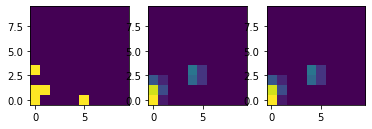

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.imshow(arr, origin='lower')
ax2.imshow(warp(arr, np.linalg.inv(rotation_matrix_3x3(theta)), order=1), origin='lower')
ax3.imshow(warp(arr, np.linalg.inv(T.T), order=1), origin='lower')

In [333]:
A @ T.T

array([[ 0.  ,  0.04,  9.  ],
       [ 0.  ,  2.12,  9.  ],
       [ 9.  , 13.  ,  1.  ]])

In [331]:
T @ A.T

array([[ 0.  ,  0.  ,  9.  ],
       [ 0.04,  2.12, 13.  ],
       [ 9.  ,  9.  ,  1.  ]])

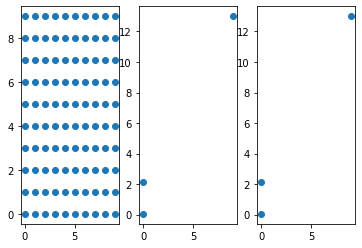

In [330]:
fig, (ax1, ax2, ax3) = plt.subplots(ncols=3)
ax1.scatter(*A2[:2])
ax2.scatter(*(T @ A.T)[:2])
ax3.scatter(*B)

In [283]:
.shape

(2, 100)

In [278]:
img1.T[:,:5]

array([[0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.04, 1.08, 2.12, 3.16, 4.2 ]])

In [260]:
B

array([[ 0.  ,  0.  ,  9.  ],
       [ 0.04,  2.12, 13.  ]])

In [225]:
A.T

(2, 3)

In [197]:
import numpy as np
# input data
ins = A
out = B
# calculations
l = len(ins)
B = np.vstack([np.transpose(ins), np.ones(l)])
D = 1.0 / np.linalg.det(B)
entry = lambda r,d: np.linalg.det(np.delete(np.vstack([r, B]), (d+1), axis=0))
M = [[(-1)**i * D * entry(R, i) for i in range(l)] for R in np.transpose(out)]
A, t = np.hsplit(np.array(M), [l-1])
t = np.transpose(t)[0]
# output
print("Affine transformation matrix:\n", A)
print("Affine transformation translation vector:\n", t)
# unittests
print("TESTING:")
for p, P in zip(np.array(ins), np.array(out)):
    image_p = np.dot(A, p) + t
    result = "[OK]" if np.allclose(image_p, P) else "[ERROR]"
    print(p, " mapped to: ", image_p, " ; expected: ", P, result)

Affine transformation matrix:
 [[ nan  nan  nan]
 [ nan  nan -inf]
 [ nan  nan  nan]]
Affine transformation translation vector:
 [nan inf nan]
TESTING:
[0. 0. 1.]  mapped to:  [nan nan nan]  ; expected:  [0.   0.04 1.  ] [ERROR]
[0. 1. 1.]  mapped to:  [nan nan nan]  ; expected:  [0.   1.08 1.  ] [ERROR]
[9. 9. 1.]  mapped to:  [nan nan nan]  ; expected:  [ 9. 13.  1.] [ERROR]
[1. 1. 1.]  mapped to:  [nan nan nan]  ; expected:  [1. 1. 1.] [ERROR]


C:\Users\thomasaar\.conda\envs\atoms\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in double_scalars
  
C:\Users\thomasaar\.conda\envs\atoms\lib\site-packages\ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in double_scalars
  # Remove the CWD from sys.path while we load stuff.


In [198]:
recover_homogenous_affine_transformation(A, B)

TypeError: only size-1 arrays can be converted to Python scalars

In [170]:
img0[0]

array([0., 0.])

In [158]:
factor = 0.01
tf = Affine2D()
width = shape[0]
tx, ty = np.array(shape) / 2
tf = tf.translate(-tx, -ty)
tf = tf.scale(1 + factor / width)
tf = tf.translate(tx, ty)

In [159]:
tf.get_matrix()

array([[ 1.001,  0.   , -0.005],
       [ 0.   ,  1.001, -0.005],
       [ 0.   ,  0.   ,  1.   ]])

In [150]:
d = img0.reshape((-1, 2))
data = np.zeros((d.shape[0], 3))
data[:, :2] = d

In [154]:
pos = (tf.get_matrix() @ data.T).T

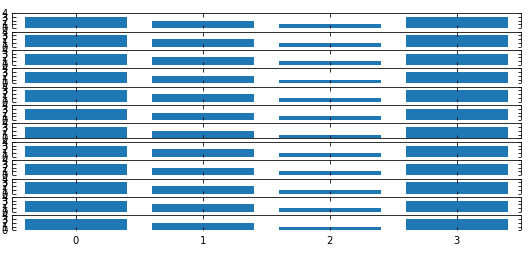

In [115]:
import mpl_toolkits.axisartist.floating_axes as floating_axes


fig = plt.figure(1, figsize=(8, 4))
fig.subplots_adjust(wspace=0.3, left=0.05, right=0.95)

r = 5

for i, angle in enumerate(np.linspace(0, 2*np.pi, 12, endpoint=False)):
    x = r*np.cos(angle)
    y = r*np.sin(angle)

    tr = Affine2D().translate(x, y)
    grid_helper = floating_axes.GridHelperCurveLinear(
        tr, extremes=(-0.5, 3.5, 0, 4))

    ax1 = floating_axes.FloatingSubplot(fig, *(12, 1, i+1), grid_helper=grid_helper)
    fig.add_subplot(ax1)

    grid_helper.grid_finder.grid_locator1._nbins = 4
    grid_helper.grid_finder.grid_locator2._nbins = 4

    aux_ax = ax1.get_aux_axes(tr)

    aux_ax.bar([0, 1, 2, 3], [3, 2, 1, 3])


In [122]:
tr = Affine2D().scale(2, 1).rotate_deg(30)

grid_helper = floating_axes.GridHelperCurveLinear(
    tr, extremes=(-0.5, 3.5, 0, 4))

fig = plt.figure()
ax1 = floating_axes.FloatingSubplot(fig, rect, grid_helper=grid_helper)
fig.add_subplot(ax1)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

C:\Users\thomasaar\.conda\envs\atoms\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  import sys


ValueError: Single argument to subplot must be a three-digit integer, not Rectangle(xy=(8.75, 8.75), width=0.5, height=0.5, angle=0)

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

ValueError: cannot reshape array of size 8 into shape (2,2)

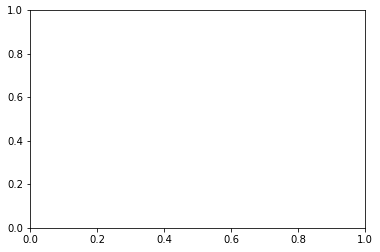

In [42]:
fig, ax = plt.subplots()
plot(drift_points(drift_strength=0.0), ax)

In [46]:
img = drift_points(drift_strength=0.0)

In [48]:
img.shape

(10, 10, 2)

In [94]:
points = img

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(-2.0, 12.0)

In [79]:
img0.reshape()

array([[[ 0. ,  0.1],
        [ 0. ,  1.2],
        [ 0. ,  2.3],
        [ 0. ,  3.4],
        [ 0. ,  4.5],
        [ 0. ,  5.6],
        [ 0. ,  6.7],
        [ 0. ,  7.8],
        [ 0. ,  8.9],
        [ 0. , 10. ]],

       [[ 1. ,  1.1],
        [ 1. ,  2.2],
        [ 1. ,  3.3],
        [ 1. ,  4.4],
        [ 1. ,  5.5],
        [ 1. ,  6.6],
        [ 1. ,  7.7],
        [ 1. ,  8.8],
        [ 1. ,  9.9],
        [ 1. , 11. ]],

       [[ 2. ,  2.1],
        [ 2. ,  3.2],
        [ 2. ,  4.3],
        [ 2. ,  5.4],
        [ 2. ,  6.5],
        [ 2. ,  7.6],
        [ 2. ,  8.7],
        [ 2. ,  9.8],
        [ 2. , 10.9],
        [ 2. , 12. ]],

       [[ 3. ,  3.1],
        [ 3. ,  4.2],
        [ 3. ,  5.3],
        [ 3. ,  6.4],
        [ 3. ,  7.5],
        [ 3. ,  8.6],
        [ 3. ,  9.7],
        [ 3. , 10.8],
        [ 3. , 11.9],
        [ 3. , 13. ]],

       [[ 4. ,  4.1],
        [ 4. ,  5.2],
        [ 4. ,  6.3],
        [ 4. ,  7.4],
        [ 4. ,  8.5],
  

array([0. , 0.1])

In [72]:
plt.xlim(-10, 30)
plt.ylim(-10, 30)


(-10.0, 30.0)

In [47]:
x, y = img0.T

In [60]:
fig, (ax1, ax2) = plt.figure()
ax1.hist2d(
    x.flatten(),
    y.flatten(), 
    range=(
        [
            (x.min() - 3, x.max() + 3), 
            (y.min() - 3, y.max() + 3)]
    ), 
    bins=100)


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([-3.  , -2.85, -2.7 , -2.55, -2.4 , -2.25, -2.1 , -1.95, -1.8 ,
        -1.65, -1.5 , -1.35, -1.2 , -1.05, -0.9 , -0.75, -0.6 , -0.45,
        -0.3 , -0.15,  0.  ,  0.15,  0.3 ,  0.45,  0.6 ,  0.75,  0.9 ,
         1.05,  1.2 ,  1.35,  1.5 ,  1.65,  1.8 ,  1.95,  2.1 ,  2.25,
         2.4 ,  2.55,  2.7 ,  2.85,  3.  ,  3.15,  3.3 ,  3.45,  3.6 ,
         3.75,  3.9 ,  4.05,  4.2 ,  4.35,  4.5 ,  4.65,  4.8 ,  4.95,
         5.1 ,  5.25,  5.4 ,  5.55,  5.7 ,  5.85,  6.  ,  6.15,  6.3 ,
         6.45,  6.6 ,  6.75,  6.9 ,  7.05,  7.2 ,  7.35,  7.5 ,  7.65,
         7.8 ,  7.95,  8.1 ,  8.25,  8.4 ,  8.55,  8.7 ,  8.85,  9.  ,
         9.15,  9.3 ,  9.45,  9.6 ,  9.75,  9.9 , 10.05, 10.2 , 10.35,
        10.5 , 10.65, 10.8 , 10.95, 11.1 

In [44]:
corners0gm

[array([0. , 0.1]), array([ 0., 10.]), array([9. , 9.1]), array([ 9., 19.])]

In [42]:

#arr = img0.reshape((-1, 2))
arr = corners.T
s = np.arange(len(arr[0]))
plt.figure()
plt.scatter(arr[1], arr[0], c=s)
ax = plt.gca()
ax.set_ylim(ax.get_ylim()[::-1])

NameError: name 'corners' is not defined

In [34]:
corners0

[(0, 0), (0, 9), (9, 0), (9, 9)]